<a href="https://colab.research.google.com/github/AG-Sign/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import scipy.io
import os
import re
import json
from scipy.io import wavfile
import librosa
import IPython.display as ipd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import math
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import models
from tensorflow.python.framework import ops

import cv2

from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Google drive Mount

In [ ]:
# Run this only once -> at the beginning of the connection

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileId = drive.CreateFile({'id': '1zKp7KzQYKdgngs4o8vgBouKdopqApn0n'})
fileId.GetContentFile(os.path.join('/content/', 'kaggle.json'))

In [ ]:
# Run this only once -> at the beginning of the connection

! pip install kaggle==1.5.6
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en
! unzip speech-emotion-recognition-en.zip -d /content/Dataset
! rm speech-emotion-recognition-en.zip

# Data Reading and Waveform Plot

In [ ]:
# SAD - sadness --
# ANG - angry --
# DIS - disgust --
# FEA - fear --
# HAP - happy --
# NEU - neutral --

In [ ]:
def read_audios_librosa(directory):
  audio = []
  label = []
  rate = []
  for files in sorted(os.listdir(directory)):
    #Getting type of the audio emotion
    tmp = files[9:12]
    label.append(tmp)
    #Loading the audio using librosa library
    (sig, srate) = librosa.load(os.path.join(directory,files),sr=None)
    audio.append(sig)
    rate.append(srate)

  return audio,label,rate

In [ ]:
def plot_waveform_librosa(pos):
  #Get time at x-axis
  time = np.linspace(0,len(audios1[pos]) / rates1[pos],num = len(audios1[pos]))
  #Resize the graph
  plt.figure(figsize=(14, 5))
  plt.title("Sound Wave")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.plot(time, audios1[pos])
  plt.show()

In [ ]:
def play_audio(pos):
  return ipd.Audio(audios1[pos],rate=rates1[pos])

In [ ]:
#Loading audios using librosa library
audios1 , labels1 , rates1 = read_audios_librosa('/content/Dataset/Crema/')

WaveForm of  ANG


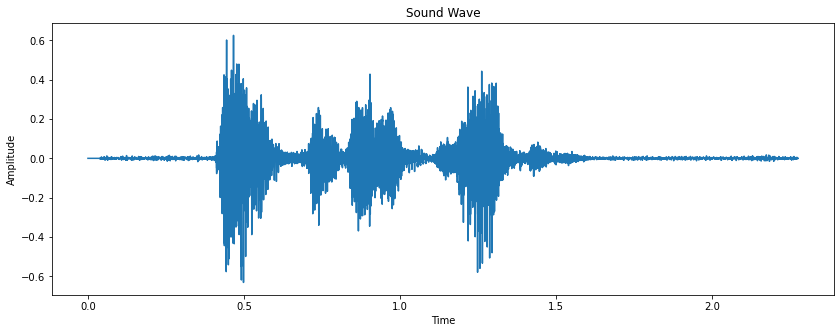

WaveForm of  ANG


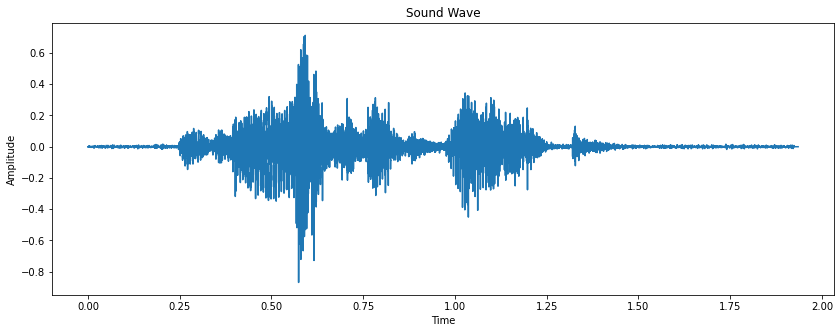

In [ ]:
#Plotting using the audio data by the librosa library

print("WaveForm of ",labels1[0])
plot_waveform_librosa(0)
print("WaveForm of ",labels1[6])
plot_waveform_librosa(6)

In [ ]:
play_audio(0)

In [ ]:
play_audio(6)

In [ ]:
play_audio(7)

In [ ]:
play_audio(8)

# Splitting Data 70-30

In [ ]:
# SAD - sadness --
# ANG - angry --
# DIS - disgust --
# FEA - fear --
# HAP - happy --
# NEU - neutral --
labels_map = {
    "SAD": 0,
     "ANG": 1,
     "DIS": 2,
     "FEA": 3,
     "HAP": 4,
     "NEU": 5
}

def mapper(element):
  return labels_map[element]

In [ ]:
labels_list = map(mapper,labels1)


In [ ]:
labels_list = list(labels_list)

In [ ]:
#2D
labels_list = labels_list + labels_list 

In [ ]:
#1D
labels_list = labels_list + labels_list + labels_list 

In [ ]:
print(len(audios1))

7442


#Data Augmentation

In [ ]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    new_data = []
    if random:
        rate = np.random.random() * threshold
    for audio in data:
      noise_amp = rate*np.random.uniform()*np.amax(audio)
      noised_data = audio + noise_amp*np.random.normal(size=audio.shape[0])
      new_data.append(noised_data)
    return new_data

In [ ]:
def stretch(data, rate=0.8):
    new_data = []
    for audio in data:
      st_data = librosa.effects.time_stretch(audio, rate)
      new_data.append(st_data)
    return new_data

In [ ]:
noised_data = noise(audios1, random=True)

In [ ]:
stretched_data = stretch(audios1)

###trying new pad tech

In [ ]:
def get_avg(audios):
  avg = 0
  for audio in audios:
    avg = avg + audio.shape[0]
  avg = round(avg / len(audios))
  return avg

In [ ]:
def pad_audios(audios,average):
  for i in range (len(audios)):
    length = audios[i].shape[0]
    if length > avg:
      audios[i] = audios[i][:avg]
    elif length < avg:
      temp = np.zeros(avg - length)
      audios[i] = np.concatenate((audios[i],temp))

In [ ]:
#2D
avg = get_avg(audios1 + noised_data )

In [ ]:
#1D
avg = get_avg(audios1 + noised_data + stretched_data)

In [ ]:
pad_audios(audios1,avg)
pad_audios(noised_data,avg)

In [ ]:
#for 1D
pad_audios(stretched_data,avg)

for 1D

In [ ]:
audios = audios1 + noised_data + stretched_data

for 2D

In [ ]:
audios = audios1 + noised_data

In [ ]:
# del audios1
# del noised_data
# del zero
# del ener
# del cent
# del band
# del roll
# del history
del spectroGram
del history

# Feature Space

In [ ]:
#MelSpectrogram
def convertoToSpectrogram(D,rate):
  spect = []
  for i in range(len(D)):
    S = librosa.feature.melspectrogram(y=D[i], sr=rate[i])
    spect.append(S)

  return spect

In [ ]:
#TIME DOMAIN

In [ ]:
#Zero Crossing Rate
def zeroCross(D):
  crossingRate = []
  for i in range(len(D)):
    S = librosa.feature.zero_crossing_rate(y=D[i])[0]
    crossingRate.append(S)

  return crossingRate

In [ ]:
#Energy rmse
def energyValue(D):
  energy = []
  for i in range(len(D)):
    S = librosa.feature.rms(y=D[i])[0]
    energy.append(S)

  return energy

In [ ]:
def chroma_energy_norm(D):
  chroma_energy = []
  for i in range(len(D)):
    S = librosa.feature.chroma_cens(y=D[i])[0]
    chroma_energy.append(S)

  return chroma_energy

In [ ]:
def spectral_centroid(D):
  cent = []
  for i in range(len(D)):
    S = librosa.feature.spectral_centroid(y=D[i])[0]
    cent.append(S)

  return cent

In [ ]:
def spectral_bandwidth(D):
  band = []
  for i in range(len(D)):
    S = librosa.feature.spectral_bandwidth(y=D[i])[0]
    band.append(S)

  return band

In [ ]:
def spectral_rolloff(D):
  roll = []
  for i in range(len(D)):
    S = librosa.feature.spectral_rolloff(y=D[i])[0]
    roll.append(S)

  return roll

In [ ]:
spectroGram = convertoToSpectrogram(audios,rates1+rates1)

In [ ]:
zero = zeroCross(audios)

In [ ]:
ener = energyValue(audios)

In [ ]:
cent = spectral_centroid(audios)

In [ ]:
band = spectral_bandwidth(audios)

In [ ]:
roll = spectral_rolloff(audios)

In [ ]:

print("Zero Crossing of first audio : ",np.array(zero[0]).shape)
print("RMS of first audio : ",np.array(ener[0]).shape)
print('============================================')
print("Zero Crossing of Second audio : ",np.array(zero[1]).shape)
print("RMS of Second audio : ",np.array(ener[1]).shape)
print('============================================')
print("Zero Crossing of Third audio : ",np.array(zero[2]).shape)
print("RMS of Third audio : ",np.array(ener[2]).shape)
print('============================================')
print("Zero Crossing of Fourth audio : ",np.array(zero[3]).shape)
print("RMS of Fourth audio : ",np.array(ener[3]).shape)
print('============================================')
print("Zero Crossing of Fifth audio : ",np.array(zero[4]).shape)
print("RMS of Fifth audio : ",np.array(ener[4]).shape)
print('============================================')

Zero Crossing of first audio :  (80,)
RMS of first audio :  (80,)
Zero Crossing of Second audio :  (80,)
RMS of Second audio :  (80,)
Zero Crossing of Third audio :  (80,)
RMS of Third audio :  (80,)
Zero Crossing of Fourth audio :  (80,)
RMS of Fourth audio :  (80,)
Zero Crossing of Fifth audio :  (80,)
RMS of Fifth audio :  (80,)


# Building Model

##zeroCross&energyValue prep

In [ ]:
features = []
for i in range (len(zero)):

  features.append(np.concatenate((zero[i],ener[i],cent[i], band[i],roll[i])))


###old padding technique

In [ ]:
def get_max(arr):
  max = -1
  for i in range (len(arr)):
    x = len(arr[i])
    if(x > max):
      max = x
  return max

In [ ]:
features_max = get_max(features)

In [ ]:
def pad_1D(s,max_i):
  for i in range (len(s)):
    temp = np.zeros(max_i - len(s[i]))
    s[i] = np.concatenate((s[i],temp))

In [ ]:
pad_1D(features,features_max)

In [ ]:
print(features_max)

In [ ]:
np.array(features).shape

(22326, 435)

###train val test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_list, test_size=0.3,random_state=5,stratify=labels_list)

In [ ]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.05,random_state=5,stratify=y_train)

In [ ]:
X_t = np.array(X_t)
X_t = (X_t - np.min(X_t))/(np.max(X_t) - np.min(X_t))
X_t = X_t[..., np.newaxis]

X_v = np.array(X_v)
X_v = (X_v - np.min(X_v))/(np.max(X_v) - np.min(X_v))
X_v = X_v[..., np.newaxis]

y_t = np.array(y_t)
temp = np.zeros((y_t.size, 6))
temp[np.arange(y_t.size),y_t] = 1
y_t = temp

y_v = np.array(y_v)
temp2 = np.zeros((y_v.size, 6))
temp2[np.arange(y_v.size),y_v] = 1
y_v = temp2

In [ ]:
X_test = np.array(X_test)
X_test = (X_test - np.min(X_test))/(np.max(X_test) - np.min(X_test))
X_test = X_test[..., np.newaxis]

y_test = np.array(y_test)
temp3 = np.zeros((y_test.size, 6))
temp3[np.arange(y_test.size),y_test] = 1
y_test = temp3

In [ ]:
X_t.shape

(14846, 435, 1)

##Spectrogram prep

###old padding technique

In [ ]:
max = -1
for i in range (len(spectroGram)):
  x = np.array(spectroGram[i]).shape[1] 
  if(x > max):
    max = x

In [ ]:
def pad_spectoGram(s):
  for i in range (len(s)):
    s[i] = np.array(s[i])
    temp = np.zeros((128,max - s[i].shape[1]))
    s[i] = np.c_[s[i],temp]

In [ ]:
pad_spectoGram(spectroGram)

In [ ]:
max

196

###train val test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spectroGram, labels_list, test_size=0.3,random_state=5,stratify=labels_list)

In [ ]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.05,random_state=5,stratify=y_train)

In [ ]:
X_t = np.array(X_t)
X_t = (X_t - np.min(X_t))/(np.max(X_t) - np.min(X_t))
X_t = X_t[..., np.newaxis]

X_v = np.array(X_v)
X_v = (X_v - np.min(X_v))/(np.max(X_v) - np.min(X_v))
X_v = X_v[..., np.newaxis]

y_t = np.array(y_t)
temp = np.zeros((y_t.size, 6))
temp[np.arange(y_t.size),y_t] = 1
y_t = temp

y_v = np.array(y_v)
temp2 = np.zeros((y_v.size, 6))
temp2[np.arange(y_v.size),y_v] = 1
y_v = temp2

In [ ]:
X_test = np.array(X_test)
X_test = (X_test - np.min(X_test))/(np.max(X_test) - np.min(X_test))
X_test = X_test[..., np.newaxis]

y_test = np.array(y_test)
temp3 = np.zeros((y_test.size, 6))
temp3[np.arange(y_test.size),y_test] = 1
y_test = temp3

In [ ]:
X_t.shape

(9897, 128, 80, 1)

#2D

##TRIAL

In [ ]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    #inception network 1
    Z1 = tfl.Conv2D(64, 1, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)

    Z4_1 = tfl.Conv2D(16, 1, activation='linear', padding="same", strides=1)(A1)
    A4_1 = tfl.ReLU()(Z4_1)

    Z4_2 = tfl.Conv2D(16, 1, activation='linear', padding="same", strides=1)(A1)
    A4_2 = tfl.ReLU()(Z4_2)

    Z4_3 = tfl.Conv2D(32, 1, activation='linear', padding="same", strides=1)(A1)
    A4_3 = tfl.ReLU()(Z4_3)

    P3_1 = tfl.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(A1)

    Z5_1 = tfl.Conv2D(52, 3, activation='linear', padding="same", strides=1)(A4_1)
    A5_1 = tfl.ReLU()(Z5_1)

    Z5_2 = tfl.Conv2D(28, 5, activation='linear', padding="same", strides=1)(A4_2)
    A5_2 = tfl.ReLU()(Z5_2)

    Z5_3 = tfl.Conv2D(16, 1, activation='linear', padding="same", strides=1)(P3_1)
    A5_3 = tfl.ReLU()(Z5_3)
    
    C = tfl.Concatenate()([A5_1, A5_2,A5_3,A4_3])

    #resnet network 1
    R_1_conv1 =  tfl.Conv2D(128, 3, activation='relu', padding="same", strides=1)(C)

    R_1_conv2 =  tfl.Conv2D(128, 3, activation='linear', padding="same", strides=1)(R_1_conv1)

    R_1_C = tfl.Add()([R_1_conv2,C])
    A_R_1 = tfl.ReLU()(R_1_C)

    #inception network 2
    Z1_b = tfl.Conv2D(128, 1, activation='linear', padding="same", strides=1)(A_R_1)
    A1_b = tfl.ReLU()(Z1_b)

    Z4_1_b = tfl.Conv2D(32, 1, activation='linear', padding="same", strides=1)(A1_b)
    A4_1_b = tfl.ReLU()(Z4_1_b)

    Z4_2_b = tfl.Conv2D(32, 1, activation='linear', padding="same", strides=1)(A1_b)
    A4_2_b = tfl.ReLU()(Z4_2_b)

    Z4_3_b = tfl.Conv2D(64, 1, activation='linear', padding="same", strides=1)(A1_b)
    A4_3_b = tfl.ReLU()(Z4_3_b)

    P3_1_b = tfl.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(A1_b)

    Z5_1_b = tfl.Conv2D(106, 3, activation='linear', padding="same", strides=1)(A4_1_b)
    A5_1_b = tfl.ReLU()(Z5_1_b)

    Z5_2_b = tfl.Conv2D(54, 5, activation='linear', padding="same", strides=1)(A4_2_b)
    A5_2_b = tfl.ReLU()(Z5_2_b)

    Z5_3_b = tfl.Conv2D(32, 1, activation='linear', padding="same", strides=1)(P3_1_b)
    A5_3_b = tfl.ReLU()(Z5_3_b)


    C_b = tfl.Concatenate()([A5_1_b, A5_2_b,A5_3_b,A4_3_b])

    #resnet network 2
    # R_2_conv1 =  tfl.Conv2D(256, 3, activation='relu', padding="same", strides=1)(C_b)
    # R_2_conv2 =  tfl.Conv2D(256, 3, activation='linear', padding="same", strides=1)(R_2_conv1)

    # R_2_C = tfl.Add()([R_2_conv2,C_b])
    # A_R_2 = tfl.ReLU()(R_2_C)

    P4 = tfl.MaxPool2D(pool_size=(3, 3), strides=(3, 3))(C_b)

    Z6 = tfl.Conv2D(256, 5, activation='linear',padding='same', strides=1)(P4)

    P5 = tfl.MaxPool2D(pool_size=(5, 5), strides=(3, 3))(Z6)
    F = tfl.Flatten()(P5)

    D1 = tfl.Dense(512, activation='relu')(F)
    D2 = tfl.Dense(256, activation='relu')(D1)
    D3 = tfl.Dense(128, activation='relu')(D2)
    outputs = tfl.Dense(6, activation='softmax')(D3)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
# def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(64, 3, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)

    Z2 = tfl.Conv2D(64, 5, activation='linear', padding="same", strides=1)(A1)
    A2 = tfl.ReLU()(Z2)

    P1 = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(A2)

    Z1_a = tfl.Conv2D(128, 3, activation='linear', padding="same", strides=1)(P1)
    A1_a = tfl.ReLU()(Z1_a)

    Z2_a = tfl.Conv2D(128, 5, activation='linear', padding="same", strides=1)(A1_a)
    A2_a = tfl.ReLU()(Z2_a)

    P1_a = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(A2_a)

    Z1_b = tfl.Conv2D(256, 3, activation='linear', padding="same", strides=1)(P1_a)
    A1_b = tfl.ReLU()(Z1_b)

    Z2_b = tfl.Conv2D(256, 5, activation='linear', padding="same", strides=1)(A1_b)
    A2_b = tfl.ReLU()(Z2_b)

    Z3_b = tfl.Conv2D(256, 7, activation='linear', padding="same", strides=1)(A2_b)
    A3_b = tfl.ReLU()(Z3_b)

    P1_b = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(A3_b)

    Z1_c = tfl.Conv2D(512, 3, activation='linear', padding="same", strides=1)(P1_b)
    A1_c = tfl.ReLU()(Z1_c)

    Z2_c = tfl.Conv2D(512, 5, activation='linear', padding="same", strides=1)(A1_c)
    A2_c = tfl.ReLU()(Z2_c)

    Z3_c = tfl.Conv2D(512, 7, activation='linear', padding="same", strides=1)(A2_c)
    A3_c = tfl.ReLU()(Z3_c)

    P1_c = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(A3_c)

    F = tfl.Flatten()(P1_c)

    D1 = tfl.Dense(512, activation='relu')(F)
    D2 = tfl.Dense(32, activation='relu')(D1)

    outputs = tfl.Dense(6, activation='softmax')(D2)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)


    Z1 = tfl.Conv2D(512, 5, activation='relu', padding="same", strides=1)(input_img)
    P1 = tfl.MaxPool2D(pool_size=(5, 5), strides=(2, 2))(Z1)
  

    Z2 = tfl.Conv2D(512, 5, activation='relu', padding="same", strides=1)(P1)
    P2 = tfl.MaxPool2D(pool_size=(5, 5), strides=(2, 2))(Z2)
 

    Z3 = tfl.Conv2D(256, 5, activation='relu', padding="same", strides=1)(P2)
    P3 = tfl.MaxPool2D(pool_size=(5, 5), strides=(2, 2))(Z3)


    Z4 = tfl.Conv2D(128, 5, activation='relu', padding="same", strides=1)(P3)
    P4 = tfl.MaxPool2D(pool_size=(5, 5), strides=(2, 2))(Z4)


    F = tfl.Flatten()(P4)

    D1 = tfl.Dense(256, activation='relu')(F)
    outputs = tfl.Dense(6, activation='softmax')(D1)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

##RUNNING

In [ ]:
#high accuracy
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)


    Z1 = tfl.Conv2D(32, 5, activation='relu', padding="same", strides=1)(input_img)
    Z1_a = tfl.Conv2D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    P1 = tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(Z1_a)
  

    Z2 = tfl.Conv2D(64, 5, activation='relu', padding="same", strides=1)(P1)
    Z2_a = tfl.Conv2D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(Z2_a)
 

    Z3 = tfl.Conv2D(128, 5, activation='relu', padding="same", strides=1)(P2)
    P3 = tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(Z3)


    Z4 = tfl.Conv2D(256, 5, activation='relu', padding="same", strides=1)(P3)
    P4 = tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(Z4)


    F = tfl.Flatten()(P4)

    D1 = tfl.Dense(256, activation='relu')(F)

    D2 = tfl.Dense(128, activation='relu')(D1)

    DR = tfl.Dropout(0.5)(D2)

    outputs = tfl.Dense(6, activation='softmax')(DR)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((128, 80, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# conv_model.compile(loss='categorical_crossentropy',
#     optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 80, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 128, 80, 32)       832       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 80, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 39, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 39, 64)        36928     
                                                             

In [ ]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_t, y_t)).batch(64)
validation_dataset = tf.data.Dataset.from_tensor_slices((X_v, y_v)).batch(64)

In [ ]:
checkpoint_filepath = '/tmp/checkpoint1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = conv_model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=[model_checkpoint_callback,callback])

Epoch 1/50
155/155 [==============================] - 22s 143ms/step - loss: 1.6816 - accuracy: 0.2638 - val_loss: 1.5592 - val_accuracy: 0.3263 - lr: 0.0010
Epoch 2/50
155/155 [==============================] - 19s 124ms/step - loss: 1.5572 - accuracy: 0.3409 - val_loss: 1.5108 - val_accuracy: 0.3896 - lr: 0.0010
Epoch 3/50
155/155 [==============================] - 19s 124ms/step - loss: 1.5126 - accuracy: 0.3754 - val_loss: 1.4607 - val_accuracy: 0.4088 - lr: 0.0010
Epoch 4/50
155/155 [==============================] - 19s 124ms/step - loss: 1.4697 - accuracy: 0.3955 - val_loss: 1.4166 - val_accuracy: 0.4012 - lr: 0.0010
Epoch 5/50
155/155 [==============================] - 19s 124ms/step - loss: 1.4489 - accuracy: 0.4094 - val_loss: 1.3882 - val_accuracy: 0.4261 - lr: 0.0010
Epoch 6/50
155/155 [==============================] - 19s 123ms/step - loss: 1.4099 - accuracy: 0.4255 - val_loss: 1.4136 - val_accuracy: 0.3973 - lr: 0.0010
Epoch 7/50
155/155 [==============================] 

In [ ]:
conv_model.load_weights(checkpoint_filepath)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)
conv_model.evaluate(test_dataset)

70/70 [==============================] - 4s 50ms/step - loss: 2.6650 - accuracy: 0.7544


[2.664994955062866, 0.7543663382530212]

#1D

In [ ]:
#highest TRAINING accuracy
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(input_img)
    Z1_a = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    P1 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z1_a)
  
    Z2 = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(P1)
    Z2_a = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z2_a)
 
    Z3 = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(P2)
    Z3_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3)
    P3 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z3_a)

    Z4 = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(P3)
    # Z4_a = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(Z4)
    P4 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z4)

    Z5 = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(P4)
    P5 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z5)
    
    F = tfl.Flatten()(P4)

    D1 = tfl.Dense(1024, activation='relu')(F)

    DR = tfl.Dropout(0.5)(D1)
    
    outputs = tfl.Dense(6, activation='softmax')(DR)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

###testing models

In [ ]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    # Z1 = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(input_img)
    # Z1_a = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    # P1 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z1_a)
  
    Z2 = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(input_img)
    # Z2_a = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z2)

 
    Z3 = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(P2)
    Z3_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3)  
    P3 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z3_a)

    # Z3s = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(P3)
    # Z3s_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3s)
    # P3s = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z3s_a)


    Z4 = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(P3)
    P4 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z4)

    Z4s = tfl.Conv1D(512, 5, activation='relu', padding="same", strides=1)(P4)
    P4s = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z4s)

    Z5 = tfl.Conv1D(512, 5, activation='relu', padding="same", strides=1)(P4s)
    P5 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z5)
    
    
    F = tfl.Flatten()(P5)

    D1 = tfl.Dense(512, activation='relu')(F)

    #DR = tfl.Dropout(0.5)(D1)

    outputs = tfl.Dense(6, activation='softmax')(D1)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
#highest TRAINING accuracy
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(input_img)
    Z1_a = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    P1 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z1_a)
  
    Z2 = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(P1)
    Z2_a = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z2_a)

    B1 = tfl.BatchNormalization()(P2)
 
    Z3 = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(B1)
    Z3_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3)
    P3 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z3_a)

    Z4 = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(P3)
    # Z4_a = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(Z4)
    P4 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z4)

    
    Z5 = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(P4)
    P5 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z5)
    
    F = tfl.Flatten()(P4)

    D1 = tfl.Dense(1024, activation='relu')(F)

    DR = tfl.Dropout(0.25)(D1)

    outputs = tfl.Dense(6, activation='softmax')(DR)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
#highest accuracy
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv1D(32, 5, activation='relu', padding="same", strides=1)(input_img)
    Z1_a = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    P1 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z1)
  
    Z2 = tfl.Conv1D(64, 5, activation='relu', padding="same", strides=1)(P1)
    Z2_a = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z2)
 
    Z3 = tfl.Conv1D(128, 5, activation='relu', padding="same", strides=1)(P2)
    Z3_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3)
    P3 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z3_a)

    Z4 = tfl.Conv1D(256, 5, activation='relu', padding="same", strides=1)(P3)
    #Z4_a = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(Z4)
    P4 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z4)

    Z5 = tfl.Conv1D(512, 5, activation='relu', padding="same", strides=1)(P4)
    #Z5_a = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(Z5)
    P5 = tfl.MaxPool1D(pool_size=2, strides=2, padding="same")(Z5)
    
    F = tfl.Flatten()(P4)

    D1 = tfl.Dense(1024, activation='relu')(F)

    # D2 = tfl.Dense(1024, activation='relu')(D1)

    # D3 = tfl.Dense(128, activation='relu')(D1)

    # DR = tfl.Dropout(0.5)(D3)

    outputs = tfl.Dense(6, activation='softmax')(D1)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
#like vgg16
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    # Z1 = tfl.Conv1D(32, 5, activation='relu', padding="same", strides=1)(input_img)
    # Z1_a = tfl.Conv1D(32, 3, activation='relu', padding="same", strides=1)(Z1)
    # P1 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z1_a)
  
    Z2 = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(input_img)
    Z2_a = tfl.Conv1D(64, 3, activation='relu', padding="same", strides=1)(Z2)
    P2 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z2_a)
 
    Z3 = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(P2)
    Z3_a = tfl.Conv1D(128, 3, activation='relu', padding="same", strides=1)(Z3)
    P3 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z3_a)

    Z4 = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(P3)
    Z4_a = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(Z4)
    Z4_b = tfl.Conv1D(256, 3, activation='relu', padding="same", strides=1)(Z4_a)
    P4 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z4_b)

    Z5 = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(P4)
    Z5_a = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(Z5)
    Z5_b = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(Z5_a)
    P5 = tfl.MaxPool1D(pool_size=3, strides=2, padding="same")(Z5_b)

    Z6 = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(P5)
    Z6_a = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(Z6)
    Z6_b = tfl.Conv1D(512, 3, activation='relu', padding="same", strides=1)(Z6_a)
    P6 = tfl.MaxPool1D(pool_size=3, strides=2, padding="same")(Z6_b)
    
    F = tfl.Flatten()(P6)

    D1 = tfl.Dense(4096, activation='relu')(F)

    # DR = tfl.Dropout(0.5)(D1)

    D2 = tfl.Dense(4096, activation='relu')(D1)

    # DR2 = tfl.Dropout(0.5)(D2)

    D3 = tfl.Dense(1000, activation='relu')(D2)

    # DR3 = tfl.Dropout(0.5)(D3)

    outputs = tfl.Dense(6, activation='softmax')(D3)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
#like pdf
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)


    Z1 = tfl.Conv1D(512, 5, activation='relu', padding="same", strides=1)(input_img)
    P1 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z1)
  
    

    Z3 = tfl.Conv1D(256, 5, activation='relu', padding="same", strides=1)(P1)
    
    B1 = tfl.BatchNormalization()(Z3)

    P3 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(B1)


    Z5 = tfl.Conv1D(128, 5, activation='relu', padding="same", strides=1)(P3)
    P5 = tfl.MaxPool1D(pool_size=5, strides=2, padding="same")(Z5)

    D = tfl.Dropout(0.25)(P5)

    F = tfl.Flatten()(D)

    D1 = tfl.Dense(256, activation='relu')(F)

    DR = tfl.Dropout(0.25)(D1)

    outputs = tfl.Dense(6, activation='softmax')(DR)
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

###run the model


In [ ]:
conv_model = convolutional_model((435,1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# conv_model.compile(loss='categorical_crossentropy',
#     optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

conv_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 435, 1)]          0         
                                                                 
 conv1d_32 (Conv1D)          (None, 435, 32)           128       
                                                                 
 conv1d_33 (Conv1D)          (None, 435, 32)           3104      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 218, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 218, 64)           6208      
                                                                 
 conv1d_35 (Conv1D)          (None, 218, 64)           12352     
                                                           

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_t, y_t)).batch(64)
validation_dataset = tf.data.Dataset.from_tensor_slices((X_v, y_v)).batch(64)

In [ ]:
checkpoint_filepath = '/tmp/checkpoint5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = conv_model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=[model_checkpoint_callback, callback])

Epoch 1/100
232/232 [==============================] - 8s 28ms/step - loss: 1.7702 - accuracy: 0.2116 - val_loss: 1.7129 - val_accuracy: 0.2839 - lr: 0.0010
Epoch 2/100
232/232 [==============================] - 6s 27ms/step - loss: 1.6065 - accuracy: 0.3330 - val_loss: 1.4991 - val_accuracy: 0.3849 - lr: 0.0010
Epoch 3/100
232/232 [==============================] - 6s 27ms/step - loss: 1.5102 - accuracy: 0.3829 - val_loss: 1.4436 - val_accuracy: 0.4258 - lr: 0.0010
Epoch 4/100
232/232 [==============================] - 6s 27ms/step - loss: 1.4676 - accuracy: 0.4078 - val_loss: 1.4285 - val_accuracy: 0.4271 - lr: 0.0010
Epoch 5/100
232/232 [==============================] - 6s 27ms/step - loss: 1.4295 - accuracy: 0.4268 - val_loss: 1.4070 - val_accuracy: 0.4552 - lr: 0.0010
Epoch 6/100
232/232 [==============================] - 6s 25ms/step - loss: 1.4029 - accuracy: 0.4410 - val_loss: 1.3935 - val_accuracy: 0.4552 - lr: 0.0010
Epoch 7/100
232/232 [==============================] - 6s 

In [ ]:
conv_model.load_weights(checkpoint_filepath)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)
conv_model.evaluate(test_dataset)

105/105 [==============================] - 1s 12ms/step - loss: 2.7125 - accuracy: 0.5418


[2.712524175643921, 0.5418035387992859]

# Big Picture

**1D**

In [ ]:
Y_pred = conv_model.predict(test_dataset)

In [ ]:
Y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
 target_names = ["SAD","ANG","DIS","FEA","HAP","NEU"]

In [ ]:
print(classification_report(y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

         SAD       0.69      0.77      0.73       763
         ANG       0.87      0.86      0.87       763
         DIS       0.70      0.70      0.70       763
         FEA       0.76      0.67      0.71       763
         HAP       0.76      0.75      0.75       762
         NEU       0.76      0.78      0.77       652

    accuracy                           0.75      4466
   macro avg       0.76      0.76      0.75      4466
weighted avg       0.76      0.75      0.75      4466



In [ ]:
confusion_matrix(y_test, Y_pred)

array([[707,  13, 126, 135,  56, 107],
       [ 17, 734, 100,  55, 194,  44],
       [132, 104, 560, 132, 138,  78],
       [194,  87, 136, 485, 162,  80],
       [ 59, 145, 103, 113, 617, 107],
       [129,  41,  95,  79, 108, 526]])

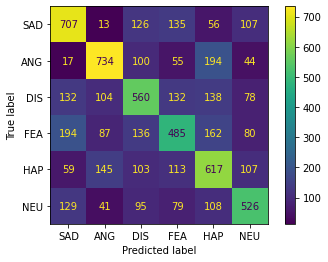

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, Y_pred,labels=[0,1,2,3,4,5]),
                              display_labels=target_names)
disp = disp.plot()

plt.show()

**Accuracy graph**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

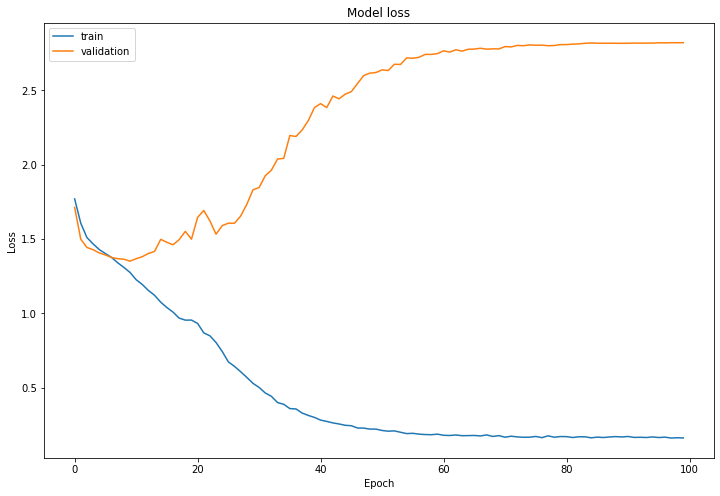

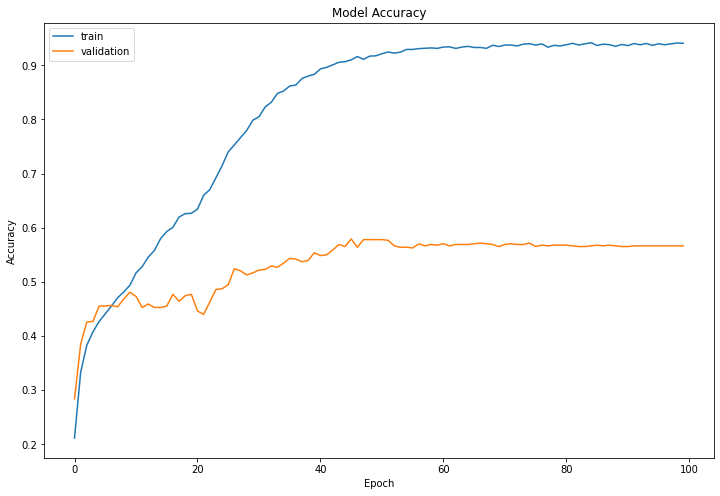

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

**2D**

In [ ]:
Y_pred = conv_model.predict(test_dataset)

In [ ]:
Y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
target_names = ["SAD","ANG","DIS","FEA","HAP","NEU"]

In [ ]:
print(classification_report(y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

         SAD       0.70      0.77      0.74       763
         ANG       0.86      0.87      0.86       763
         DIS       0.70      0.70      0.70       763
         FEA       0.76      0.68      0.72       763
         HAP       0.76      0.75      0.76       762
         NEU       0.79      0.79      0.79       652

    accuracy                           0.76      4466
   macro avg       0.76      0.76      0.76      4466
weighted avg       0.76      0.76      0.76      4466



In [ ]:
confusion_matrix(y_test, Y_pred)

array([[590,   3,  71,  56,  15,  28],
       [  1, 660,  41,   9,  40,  12],
       [ 79,  31, 536,  34,  48,  35],
       [115,  18,  41, 517,  50,  22],
       [  9,  53,  39,  45, 575,  41],
       [ 45,   4,  36,  21,  33, 513]])

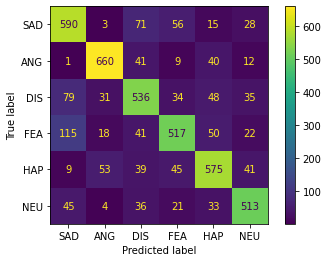

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, Y_pred,labels=[0,1,2,3,4,5]), display_labels=target_names)
disp = disp.plot()

plt.show()

**Accuracy graph**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

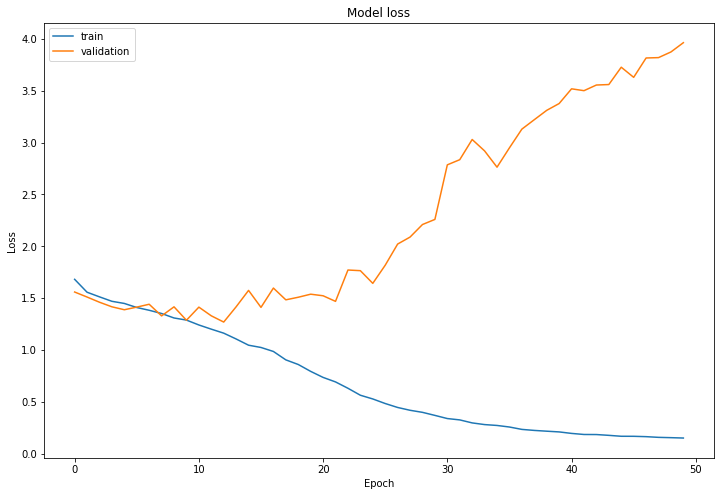

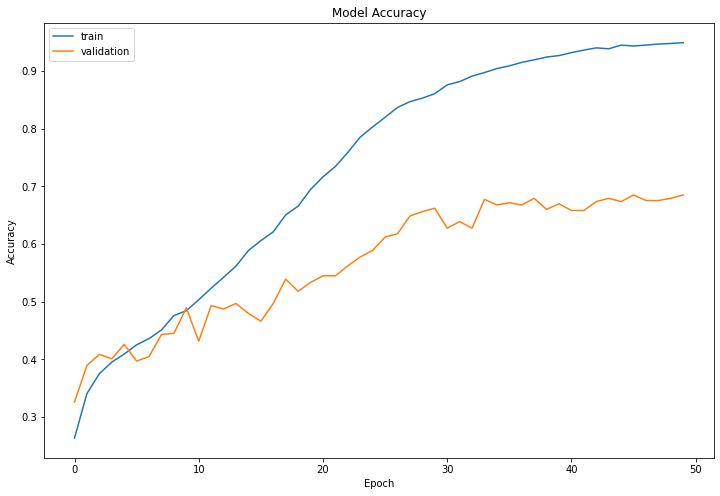

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')